In [65]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm as nm
from scipy import optimize
import matplotlib.pyplot as plt

# delta, gamma, vega, rho, theta
# gamma and vega same
# call and put
# sensitivty of a price with respect to parameters

In [66]:
# Read data - input is a file path and returns an array of the close values
def readFile(path):
    df = pd.read_csv(path)
    data = df["Close"]
    return data.to_numpy

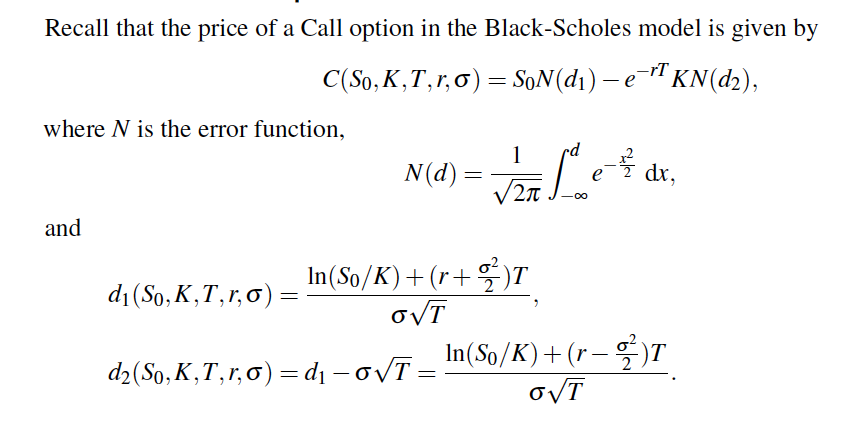

In [67]:
def callBS(K, s0, T, r, sigma):
    d = (lambda i: np.log(s0/K) +  (r - (-1)**i * (sigma**2)/2) * T) (sigma * math.sqrt(T))
    price = s0 * nm.cdf(d(1)) - np.exp(-r * T) * K * nm.cdf(d(2))
    return price

In [68]:
def putBS(K, s0, T, r, sigma):
    d = lambda i: (np.log(s0/K) + (T * (r - (-1)**i * (sigma**2/2))))/(sigma * np.sqrt(T))
    price = -s0 * nm.cdf(-d(1)) + K * np.exp(-r * T)* nm.cdf(-d(2))
    return price

In [69]:
def callGreeks(K, s0, T, r, sigma):
    d = lambda i: (np.log(s0/K) +  (r - (-1)**i * (sigma**2)/2) * T)/(sigma * math.sqrt(T))
    deltaC = nm.cdf(d(1))
    gammaC = nm.pdf(d(1)) / (s0 * sigma * np.sqrt(T))
    thetaC = (- sigma * s0 * nm.pdf(d(1))) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * nm.cdf(d(2))
    vegaC = s0 * math.sqrt(T) * nm.pdf(d(1))
    
    call = np.array([deltaC, gammaC, thetaC, vegaC])
    
    return call

In [70]:
def putGreeks(K, s0, T, r, sigma):
    d = lambda i: (np.log(s0/K) +  (r - (-1)**i * (sigma**2)/2) * T)/ (sigma * math.sqrt(T))
    deltaP = nm.cdf(d(1)) - 1
    gammaP = nm.pdf(d(1)) / (s0 * sigma * np.sqrt(T))
    thetaP = -((s0 * nm.pdf(d(1)) * sigma) / (2 * np.sqrt(T))) + r * K * np.exp(-r * T) * nm.cdf(-d(2))
    vegaP = s0 * math.sqrt(T) * nm.pdf(d(1))
    
    put = np.array([deltaP, gammaP, thetaP, vegaP])
    
    return put

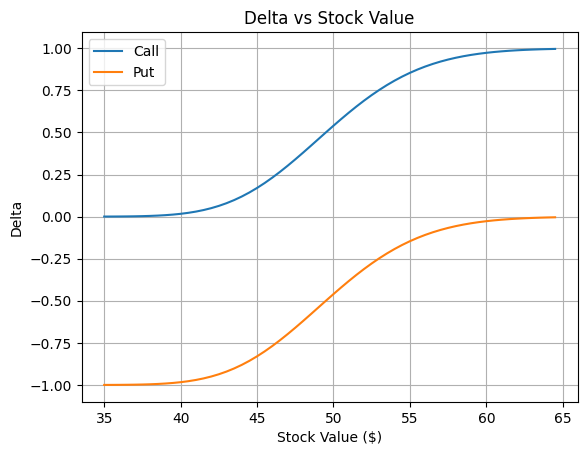

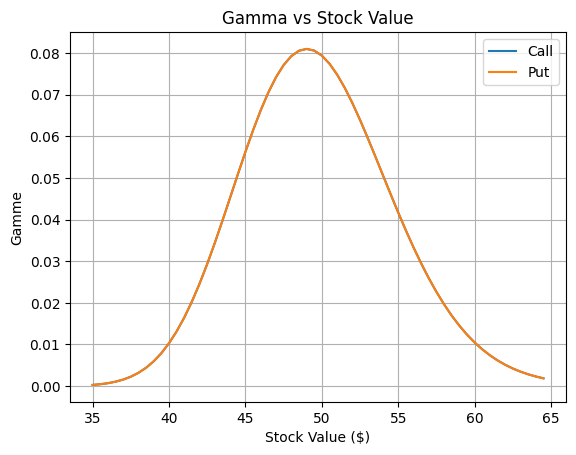

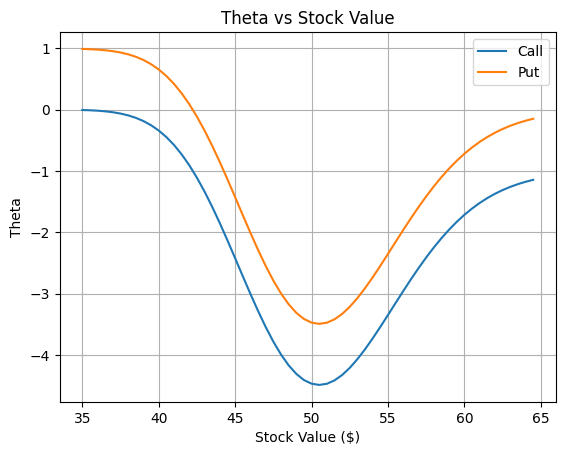

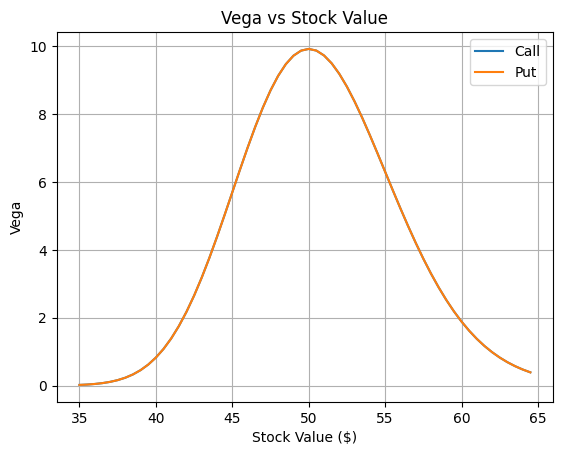

In [71]:
# arbitrary values
K = 50
r = 0.02
T = 0.25
sigma = 0.2

s0 = np.arange(35, 65, 0.5)
callG = []
putG = []

# calculate greeks based on differnet stock values
for value in s0:
    temp = callGreeks(K, value, T, r, sigma)
    callG.append(callGreeks(K, value, T, r, sigma))
    putG.append(putGreeks(K, value, T, r, sigma))
    
callG = np.array(callG)
putG = np.array(putG)
callD = callG[:, 0]
    
# delta vs s0
plt.plot(s0, callG[:, 0], label='Call')
plt.plot(s0, putG[:, 0], label='Put')
plt.grid(True)
plt.legend()
plt.xlabel("Stock Value ($)")
plt.ylabel("Delta")
plt.title("Delta vs Stock Value")
plt.show()

# gamma vs s0
plt.plot(s0, callG[:, 1], label='Call')
plt.plot(s0, putG[:, 1], label='Put')
plt.grid(True)
plt.legend()
plt.xlabel("Stock Value ($)")
plt.ylabel("Gamme")
plt.title("Gamma vs Stock Value")
plt.show()

# theta vs s0
plt.plot(s0, callG[:, 2], label='Call')
plt.plot(s0, putG[:, 2], label='Put')
plt.grid(True)
plt.legend()
plt.xlabel("Stock Value ($)")
plt.ylabel("Theta")
plt.title("Theta vs Stock Value")
plt.show()

# vega vs s0
plt.plot(s0, callG[:, 3], label='Call')
plt.plot(s0, putG[:, 3], label='Put')
plt.grid(True)
plt.legend()
plt.xlabel("Stock Value ($)")
plt.ylabel("Vega")
plt.title("Vega vs Stock Value")
plt.show()

In [72]:
def impliedVol(opPrice, s0, K, r, T):
    def formula(sigma):
        return putBS(K, s0, T, r, sigma) - opPrice
    
    impliedVol = optimize.brentq(formula, 0, 5, xtol = 1.0e-6)
    return impliedVol

/var/folders/9j/_2xn1jdn2g97z_0bk9lqzm4m0000gn/T/ipykernel_13825/3361759119.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d = lambda i: (np.log(s0/K) + (T * (r - (-1)**i * (sigma**2/2))))/(sigma * np.sqrt(T))


Text(0.5, 1.0, 'Implied Volatility vs Strike Price')

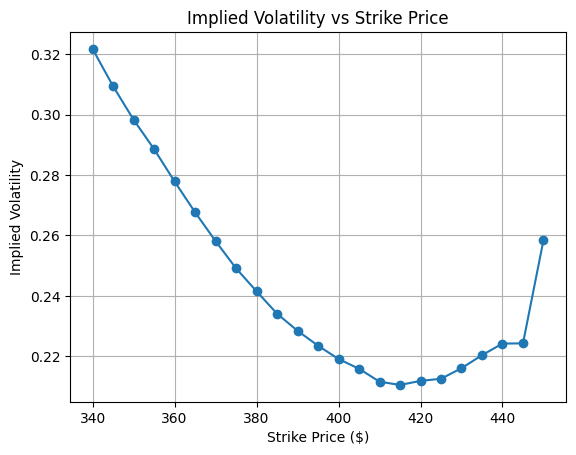

In [73]:
dataframe1 = pd.read_excel('yahooStocks/microsoftPut.xlsx')
data = dataframe1.to_numpy()
impliedVols = []
s0 = 414.58
r = 0.0275
T = 39/365


strikes = []
for i in range(int(data.size/4)):
    strikes.append(data[i][0])

for i in range(int(data.size/4)):
    opPrice = (data[i][2] + data[i][3]) / 2
    sigma = impliedVol(opPrice, s0, data[i][0], r, T)
    impliedVols.append(sigma)
    

plt.plot(strikes, impliedVols, marker='o')
plt.grid(True)
plt.xlabel("Strike Price ($)")
plt.ylabel("Implied Volatility")
plt.title("Implied Volatility vs Strike Price")